In [9]:
# Import Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import os
import scipy.stats as sp

%matplotlib inline

In [2]:
stock_dict = {}

stock_list = []

date = input("Pick a start date for your analysis (YYYY-MM-DD): ")

while (True):
    name = input("Add a stock ticker to the list: ")
    stock_dict[name] = date
    stock_list.append(name)
    cont = input("Press 'y' to Add Another Stock, press 'Enter' to exit")
    if cont == "":
        break;

Pick a start date for your analysis (YYYY-MM-DD):  2020-01-01
Add a stock ticker to the list:  MSFT
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  TSLA
Press 'y' to Add Another Stock, press 'Enter' to exit 


In [3]:
def stockCreation(stock_dict, stock_list):
    func_list = []
    for key, value in stock_dict.items():
        globals()[key] = pdr.DataReader(f'{key}','yahoo',value)
        globals()[key] = globals()[key]['Adj Close']
        func_list.append(globals()[key])
    
    portfolio = pd.concat(func_list, axis='columns', join='inner')
    portfolio.columns = stock_list
    
    return portfolio

In [4]:
portfolio = stockCreation(stock_dict, stock_list)
portfolio

,MSFT,TSLA
Date,,
2020-01-02,158.936279,86.052002
2020-01-03,156.957260,88.601997
2020-01-06,157.362961,90.307999
2020-01-07,155.928177,93.811996
2020-01-08,158.411835,98.428001
2020-01-09,160.390869,96.267998
2020-01-10,159.648727,95.629997
2020-01-13,161.568405,104.972000
2020-01-14,160.430450,107.584000


# Rolling Statistics

## Definition: Looking at rolling statistics gives performance results that are smoothed over defined periods throughout its history. 

## Purpose: To create a more accurate picture than a single snapshot of one period.

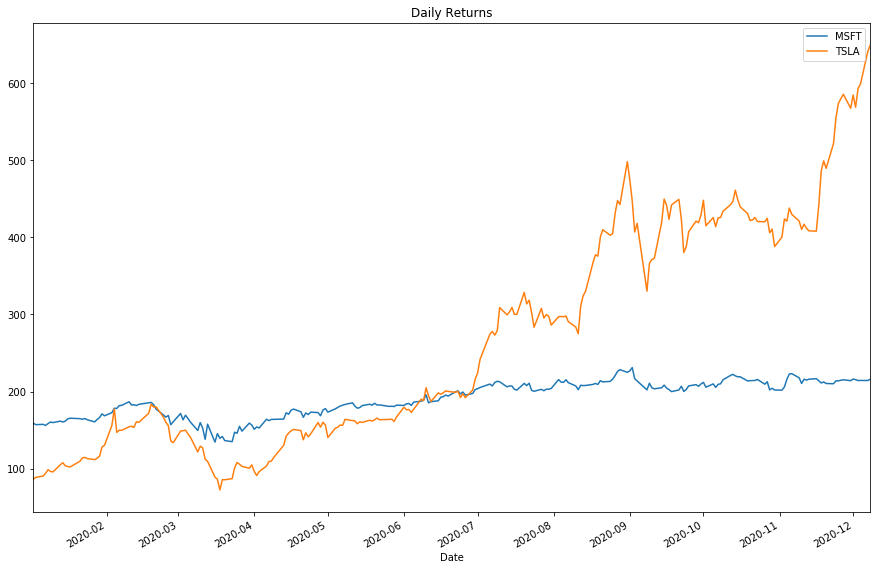

In [6]:
# Rolling Statistics vs Regular Statistics

dailyreturnsplot = portfolio_close.plot(figsize=(15,10), title='Daily Returns');

dailyreturnsplot.figure.savefig(f"Images/dailyreturnsplot.png", bbox_inches='tight')

## A graph of daily returns can be volitile, make it difficult to determine overall trends.  Based on this graph, what stocks do you think are increasing overall?  Decreasing?

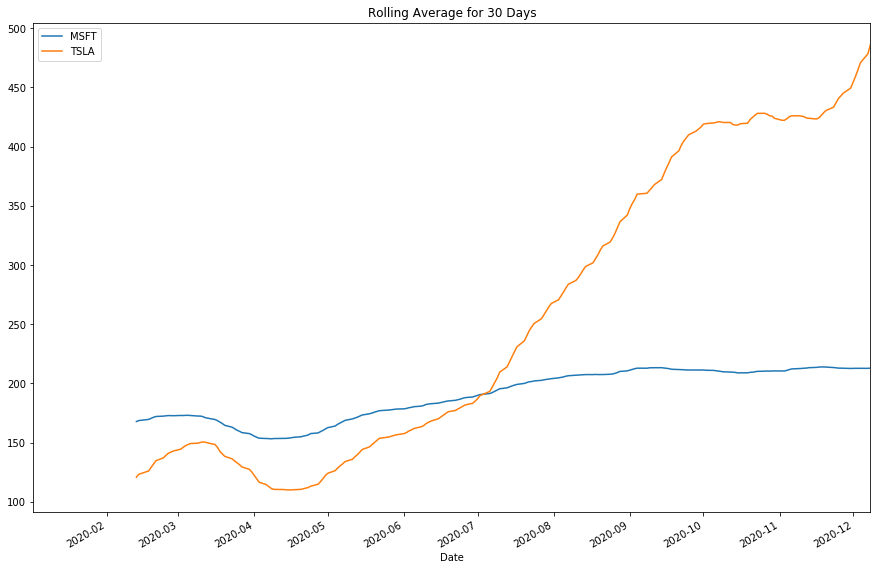

In [5]:
# Rolling Statistics - AVG

# Takes out daily variablitity

rollingmean = portfolio_close.rolling(window=30).mean()

rollingmeanplot = rollingmean.plot(figsize=(15,10), title='Rolling Average for 30 Days');

rollingmeansplot.figure.savefig(f"Images/rollingmeansplot.png", bbox_inches='tight')

## Taking the 30 day rolling average smoothes the graphs and makes it easier to see overall trends. Based on the rolling average, would you change your previous answers?

## The Standard Deviation (STD) is a measure of the volitility of a stock.  It can be calculated as a single statistic for an entire dataset.  The higher the STD, the more volitile a stock.

In [11]:
# Calculate STD

overallstd = portfolio.std().sort_values()
overallstd.figure.savefig(f"Images/overallstd.png", bbox_inches='tight')

MSFT     23.003468
TSLA    144.937297
dtype: float64

## Based on this statistic, what can you say about the volitility of your stocks?

## The Rolling STD looks at changes in volitility over time.

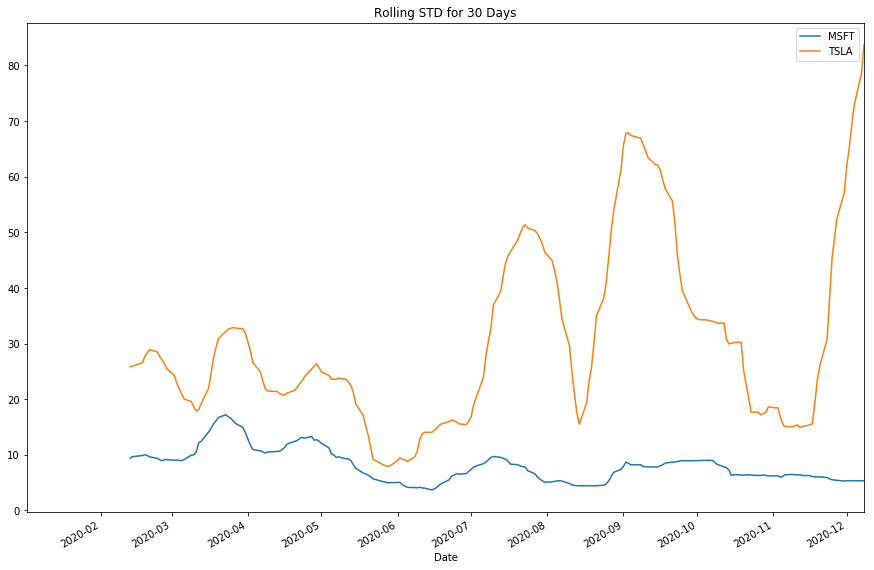

In [10]:
# Rolling STD for 30 days

rollingstd = portfolio.rolling(window=30).std()

rollingstdplot = rollingstd.plot(figsize=(15,10), title='Rolling STD for 30 Days');

rollingstdplot.figure.savefig(f"Images/rollingstdplot.png", bbox_inches='tight')

## Based on this plot, how would you describe the volitility of your stocks?  Are some more volitle than others?  Do they have periods of higher and lower volitility?  What could influence these?